### Unsupervised Learning - Clustering

In [123]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [124]:
# load the dataset 
heart_df = pd.read_csv("../data/heart.csv") 
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [103]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
# Separate features and target
X = heart_df.drop(['target'] , axis=1 ) 
y = heart_df['target']

In [107]:
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler() 
X_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)


### Model Deployment

1- K-Means Clustering 

In [108]:
# KNN Classifier
from sklearn.cluster  import KMeans 
kmean = KMeans(n_clusters=2, random_state=42 , init="k-means++")
kmean.fit(X_scaled )

d:\Anakonda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [109]:
kmean.cluster_centers_

array([[-0.25017901, -0.09455968,  0.36221692, -0.12806535, -0.04723996,
        -0.04075883,  0.07420602,  0.46920313, -0.47682522, -0.40103412,
         0.38146533, -0.31050678, -0.21777611],
       [ 0.44527273,  0.16829888, -0.64467965,  0.22793283,  0.08407846,
         0.07254325, -0.13207311, -0.83509548,  0.8486614 ,  0.71376714,
        -0.67893829,  0.55264509,  0.38760152]])

In [110]:
kmean.inertia_

3331.6410550245205

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, heart_df['cluster'])
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 43  95]
 [151  14]]


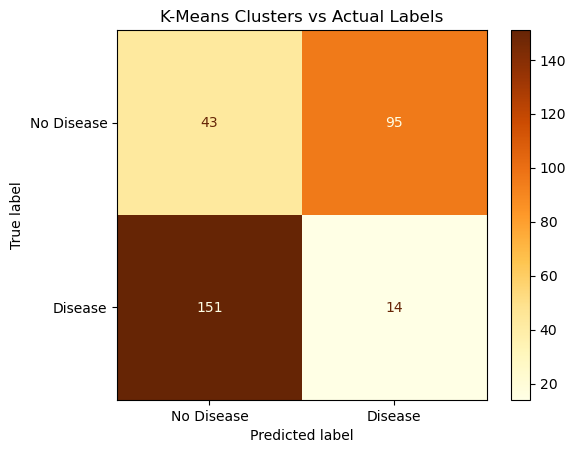

In [113]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
disp.plot(cmap="YlOrBr")
plt.title("K-Means Clusters vs Actual Labels")
plt.grid(False)
plt.show()


### Finding the Optimal Number of Clusters (Elbow / Knee Method)

d:\Anakonda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anakonda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anakonda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
d:\Anakonda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

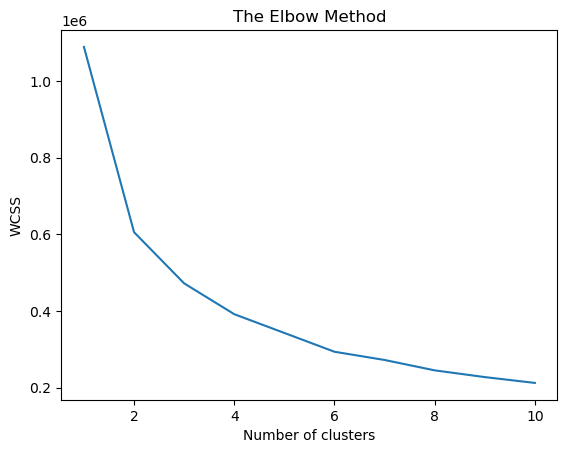

In [114]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Final Model

In [115]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Convert X to NumPy array for slicing
X_array = X.values

d:\Anakonda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


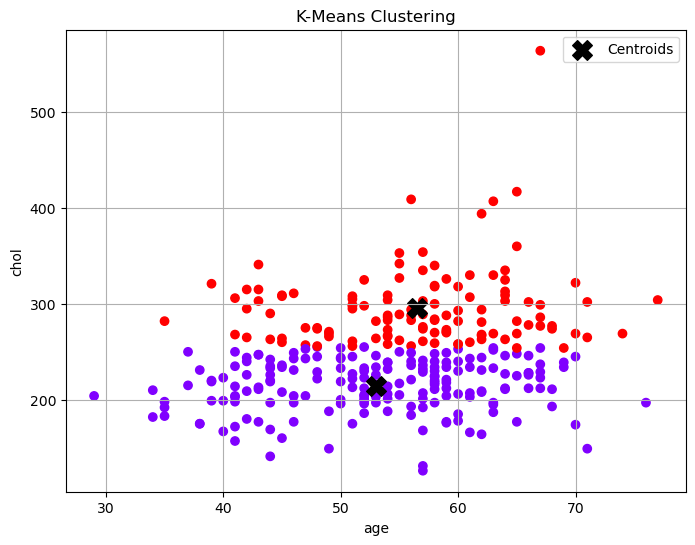

In [120]:
# Plot the clusters (only using the first 2 features for 2D plot)
plt.figure(figsize=(8, 6))
plt.scatter(X_array[:, 0], X_array[:, 4], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 4],
            s=200, c='black', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[4])
plt.legend()
plt.grid(True)
plt.show()

2- Hierarchical Clustering

In [142]:
heart = pd.read_csv("../data/heart.csv") 
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


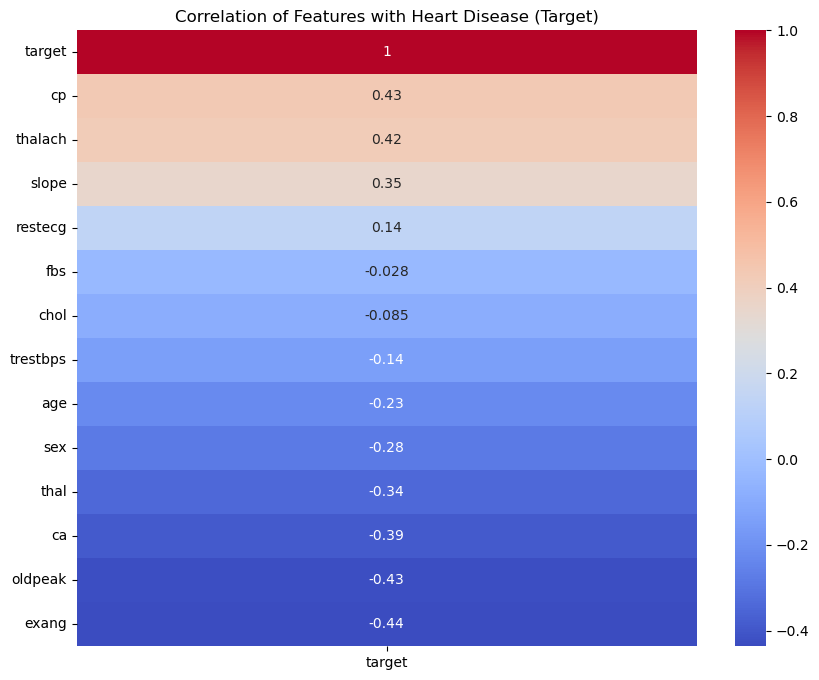

In [156]:
correlation = heart.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation[['target']].sort_values(by='target', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Heart Disease (Target)")
plt.show()

In [143]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [178]:
X = heart.iloc[: , [3 , 4]].values
X

array([[145, 233],
       [130, 250],
       [130, 204],
       [120, 236],
       [120, 354],
       [140, 192],
       [140, 294],
       [120, 263],
       [172, 199],
       [150, 168],
       [140, 239],
       [130, 275],
       [130, 266],
       [110, 211],
       [150, 283],
       [120, 219],
       [120, 340],
       [150, 226],
       [150, 247],
       [140, 239],
       [135, 234],
       [130, 233],
       [140, 226],
       [150, 243],
       [140, 199],
       [160, 302],
       [150, 212],
       [110, 175],
       [140, 417],
       [130, 197],
       [105, 198],
       [120, 177],
       [130, 219],
       [125, 273],
       [125, 213],
       [142, 177],
       [135, 304],
       [150, 232],
       [155, 269],
       [160, 360],
       [140, 308],
       [130, 245],
       [104, 208],
       [130, 264],
       [140, 321],
       [120, 325],
       [140, 235],
       [138, 257],
       [128, 216],
       [138, 234],
       [130, 256],
       [120, 302],
       [130,

Exploring Data

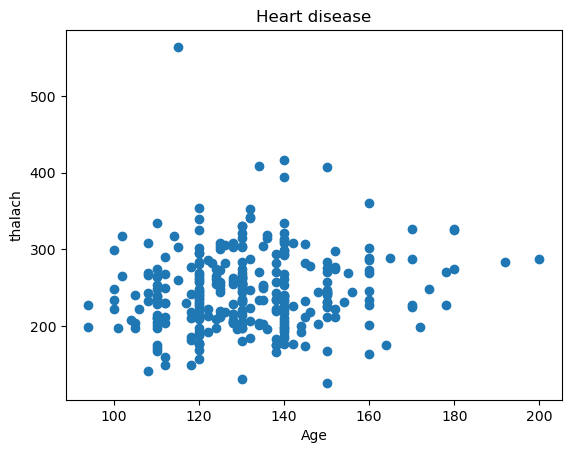

In [179]:
plt.scatter(X[: ,0] , X[: ,1])
plt.title("Heart disease")
plt.xlabel("Age") 
plt.ylabel("thalach") 
plt.show()


In [180]:
import scipy.cluster.hierarchy as sch

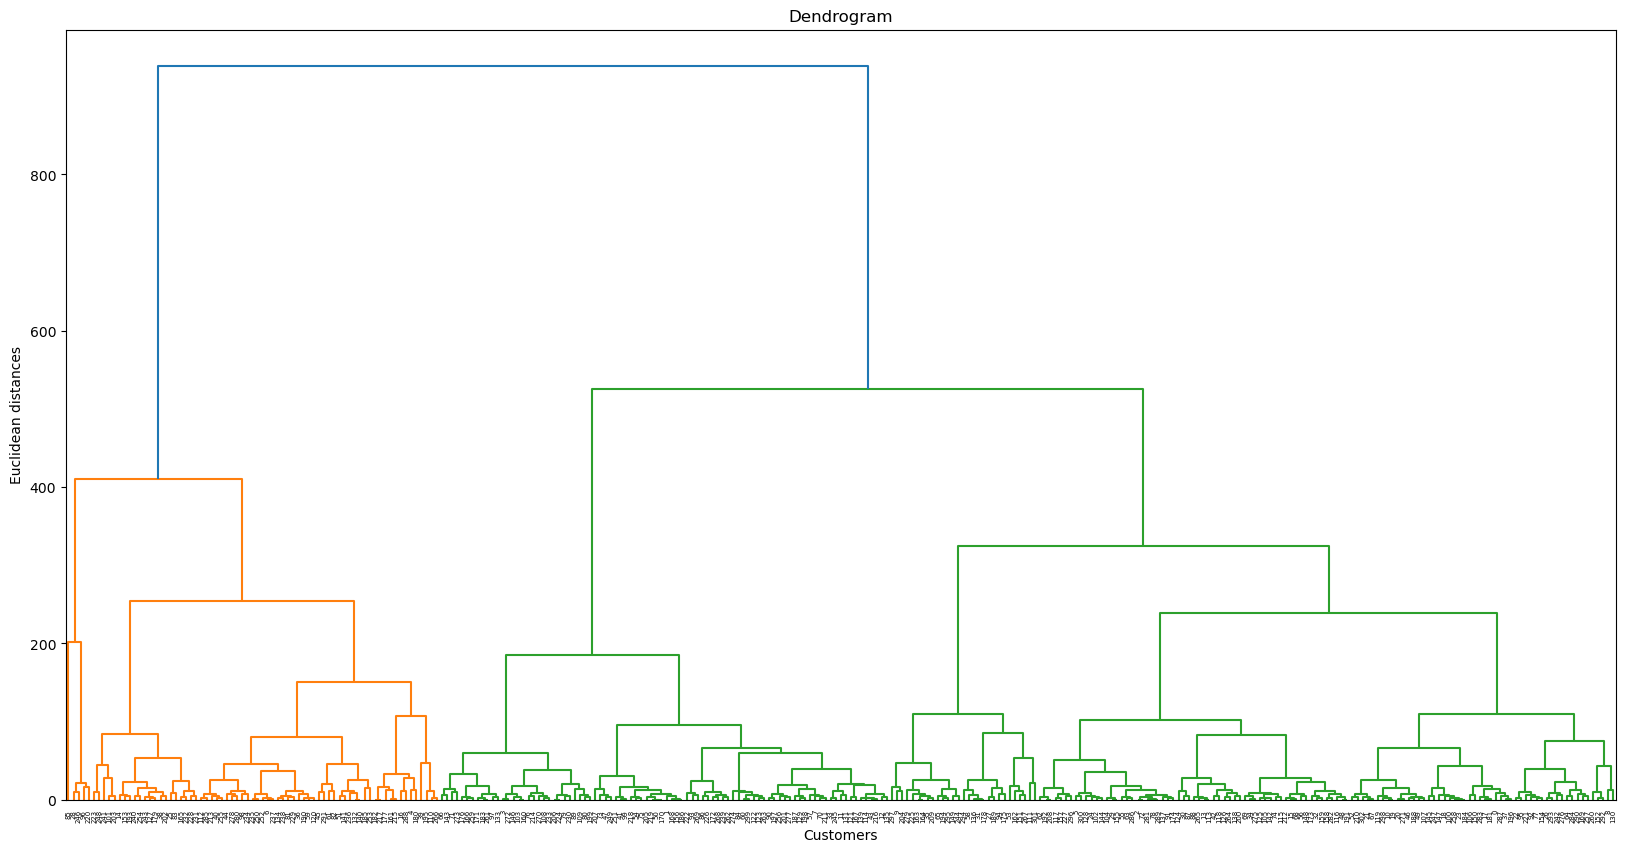

In [181]:
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Model Training & Prediction

In [182]:
from sklearn.cluster import AgglomerativeClustering 
ac = AgglomerativeClustering() 
ac.fit(X) 

AgglomerativeClustering()

In [183]:
ac.labels_

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [184]:
ac.get_params()

{'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'metric': 'euclidean',
 'n_clusters': 2}

In [185]:
y_ac = ac.fit_predict(X) 
y_ac

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

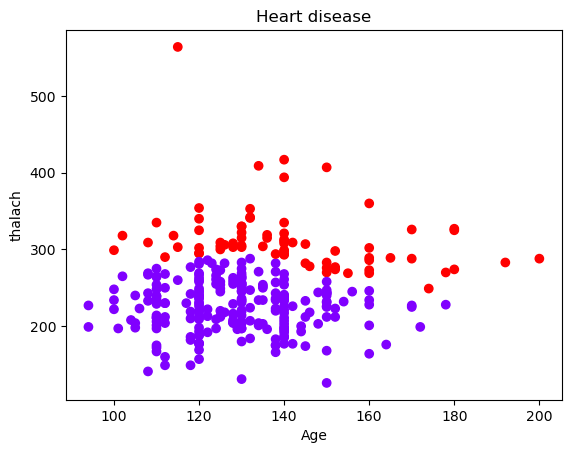

In [186]:
plt.scatter(X[:,0], X[:,1], c=ac.labels_, cmap='rainbow')
plt.title('Heart disease')
plt.xlabel('Age')
plt.ylabel('thalach')
plt.show()

In [187]:
heart_clustered = heart.copy()
heart_clustered['clusters'] = y_ac
heart_clustered

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,clusters
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


Compare the clustering results (y_ac) with the actual disease labels (target).

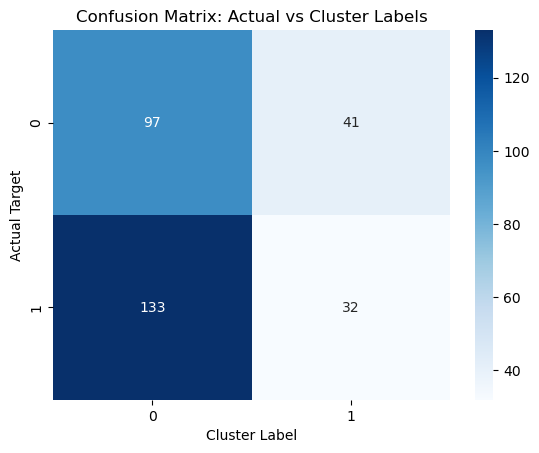

In [188]:
y_true = heart['target'].values

# Compare with actual labels using confusion matrix
cm = confusion_matrix(y_true, y_ac)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Actual vs Cluster Labels")
plt.xlabel("Cluster Label")
plt.ylabel("Actual Target")
plt.show()
